In [1]:
!pip install pydataset











  Running setup.py bdist_wheel for pydataset: started
  Running setup.py bdist_wheel for pydataset: finished with status 'done'
  Stored in directory: C:\Users\damir.pajaziti\AppData\Local\pip\Cache\wheels\fe\3f\dc\5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


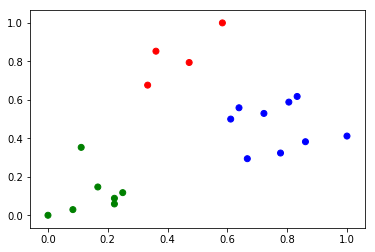

In [22]:
import pandas as pd 
import numpy as np
from pydataset import data
from matplotlib import pyplot as plt

age = [18, 21, 22, 24, 26, 26, 27, 30, 31, 35, 39, 40, 41, 42, 44, 46, 47, 48, 49, 54]
salary = [10000, 11000, 22000, 15000, 12000, 13000, 14000, 33000, 39000, 37000, 44000, 27000, 29000, 20000, 28000, 21000, 30000, 31000, 23000, 24000]

# Kreiramo jedan vektor

df = pd.DataFrame({'Age': age, 'Salary': salary})
# print(df.head())

# Prima 2 kontinualna niza scatter plot - dijagram sa tackicama
plt.scatter(age, salary)
plt.title('Market data')
plt.xlabel('Age')
plt.ylabel('Salary')

# Import kmeans
from sklearn.cluster import KMeans

kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100)

print(kmeans_algorithm)

cluster_model = kmeans_algorithm.fit(df)
# uzmi centroide
cluster_model.cluster_centers_

# dodeljivanje klastera
clusters = cluster_model.predict(df)

df['Cluster'] = clusters

df.head()

# mapiranje moja na plot 
    # kreiranje mape
cluster_map = {0:'g', 1:'b', 2:'r'}
    # list comprehention (za svaku vrednost iz cluster-a nadji mapu neko slovo i vrati)
cluster_color = [cluster_map[i] for i in df.Cluster]

# primeniti boje na ploter
plt.close()
plt.scatter(df.Age, df.Salary, c = cluster_color, label = df.Cluster)

centers = cluster_model.cluster_centers_
# kreiramo  novi scatter
plt.scatter(centers[:,0], centers[:,1], marker = '+', s = 200, c = 'black')

# Normalizacija sklearn (min max scaler)

from sklearn.preprocessing import MinMaxScaler

df_normalized = df.loc[:, ['Age','Salary']]

scaler = MinMaxScaler()

scaler.fit(df_normalized)

df_normalized = scaler.transform(df_normalized)

# type(df_normalized)

k_means_norm = kmeans_algorithm.fit(df_normalized)
        # izvlacimo model (to su centroidi)
centers_norm = k_means_norm.cluster_centers_

df_normalized = pd.DataFrame(df_normalized, columns = ['Age', 'Salary'])

clusters_n = k_means_norm.predict(df_normalized)

colors_norm = [cluster_map[i] for i in clusters_n]

plt.close()
plt.scatter(df_normalized.Age, df_normalized.Salary, c = colors_norm)




In [24]:
df = df.loc[:, ['Age', 'Salary']]
print(df)

    Age  Salary
0    18   10000
1    21   11000
2    22   22000
3    24   15000
4    26   12000
5    26   13000
6    27   14000
7    30   33000
8    31   39000
9    35   37000
10   39   44000
11   40   27000
12   41   29000
13   42   20000
14   44   28000
15   46   21000
16   47   30000
17   48   31000
18   49   23000
19   54   24000


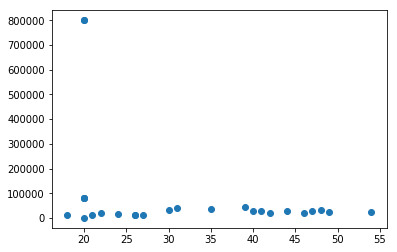

In [30]:
# dodati novi outlier

df = df.append({'Age': 20,'Salary': 80000}, ignore_index = True)

plt.close()
plt.scatter(df.Age, df.Salary)